<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/bdm/Ayam%20Rendang/ass5AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 5

Group Members :

*   NURUL WAHIEDA BINTI MUHAMMAD FARID SELLEKUMAR (MCS231022)
*   THANEATHARRAN A/L SANTHARASEKARAN (MSC232006)
*   RANJEET A/L THIAGARAJAN (MCS231015)
*   LINGGESH A/L TAMILMANI (MCS232005)

Dataset : Predict Diabetes

This dataset is originally from the National Institute of Diabetes and Digestive and KidneyDiseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Description

Pregnancies-To express the Number of pregnancies

Glucose	- To express the Glucose level in blood

BloodPressure	-To express the Blood pressure measurement

SkinThickness-	To express the thickness of the skin

Insulin-	To express the Insulin level in blood

BMI	-To express the Body mass index

DiabetesPedigreeFunction	-To express the Diabetes percentage

Age	-To express the age

Outcome-	To express the final result 1 is Yes and 0 is No




# **Loading the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes-vid.csv to diabetes-vid.csv


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('data set - diabetes - vid - csv.csv').head(3000)

FileNotFoundError: ignored

# **Exploratory Data Analysis (EDA)**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB
None


In [ ]:
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


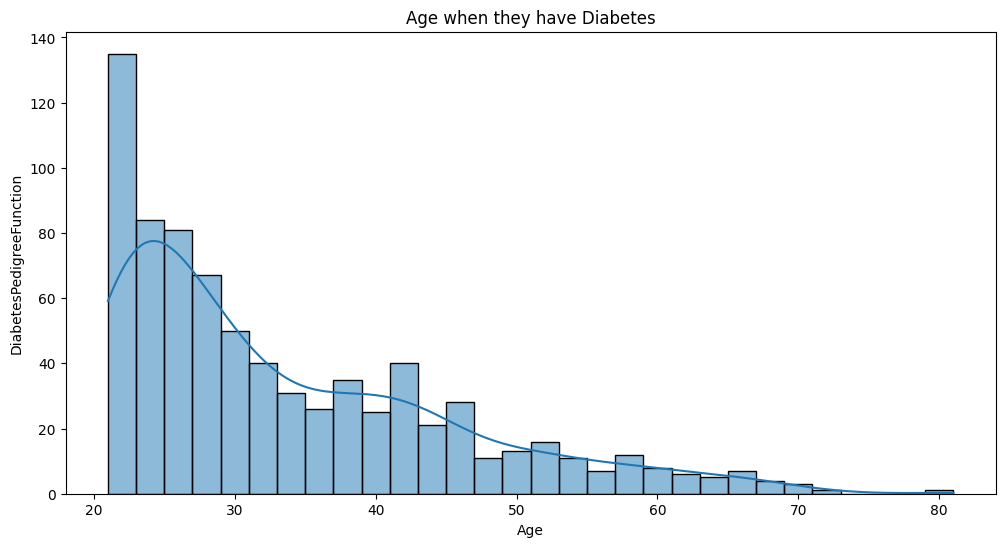

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age when they have Diabetes')
plt.xlabel('Age')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()

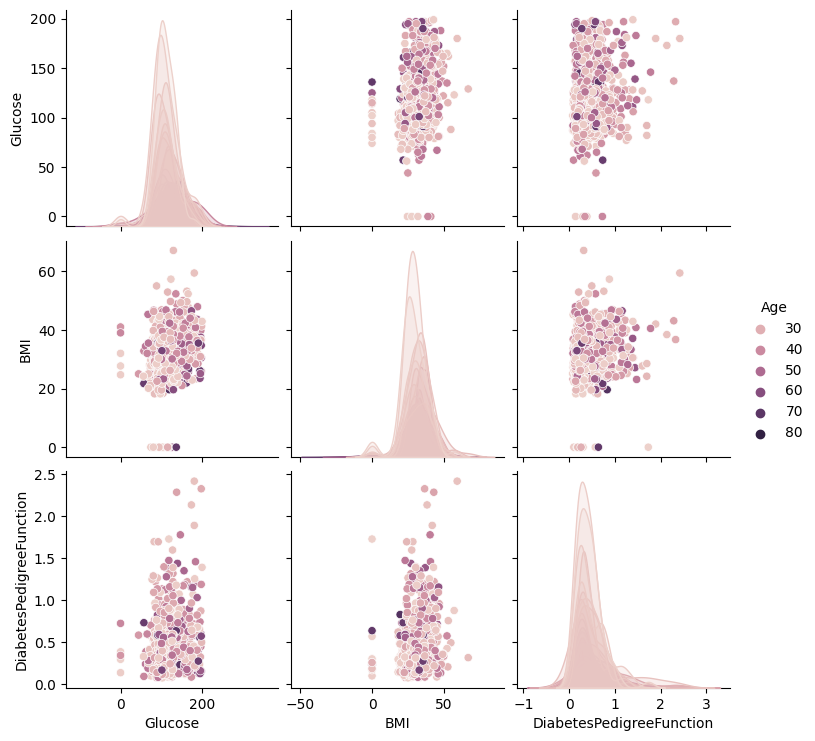

In [ ]:
sns.pairplot(df, vars=['Glucose', 'BMI', 'DiabetesPedigreeFunction'], hue='Age')
plt.show()

<ipython-input-18-d41c670d8d84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


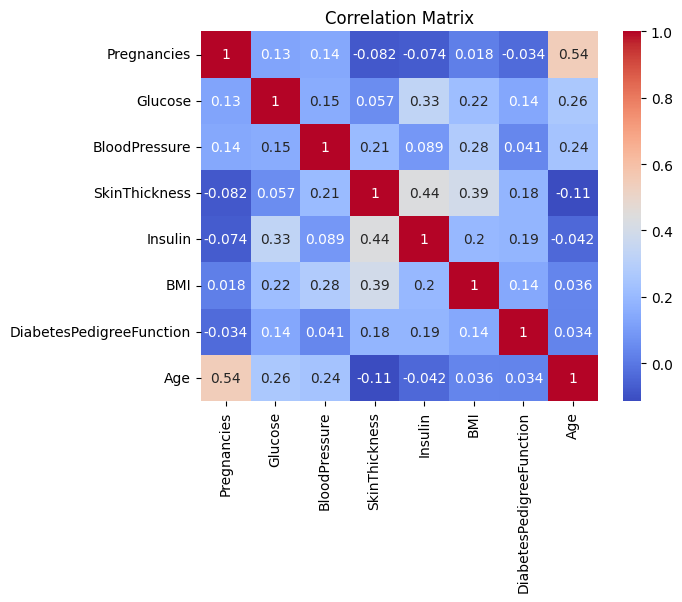

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{column}': {df[column].unique()}")

Unique values in 'Outcome': ['dead' 'alive']


# Feature Engineering with Automated **Tools H20.ai**


In [ ]:
#Install H2O:
!pip install requests
!pip install tabulate
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=dc6106c81fea0963302bc469c56815f003d83c73339d542940f8c38aac82994e
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [ ]:
#Import Libraries:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
#Initialize H2O Cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpex7xk9ps
  JVM stdout: /tmp/tmpex7xk9ps/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpex7xk9ps/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_cllfr0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
import h2o

# Initialize H2O
h2o.init()

# Load the dataset
df = h2o.import_file('data set - diabetes - vid - csv.csv')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 mins 55 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_cllfr0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
#Split Data:
train, test = df.split_frame(ratios=[0.8])

In [ ]:
aml = H2OAutoML(max_models=10, seed=1)
aml.train(y="DiabetesPedigreeFunction", training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20231125_94428


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    27                 27                          2920                   2            3            2.81481       3             4             3.92593

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.10016892907115797
RMSE: 0.31649475362343366
MAE: 0.23384069822283285
RMSLE: 0.1895229095023813
Mean Residual Deviance: 0.10016892907115797

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.10727522695604376
RMSE: 0.3275289711705573
MAE: 0.24309869252836366
RMSLE: 0.19678371365121292
Mean Residual Deviance: 0.10727522695604376

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.242927   0.0162815  0.237129      0.220194      0.245749      0.265042      0.24652
mean_residual_deviance  0.107366   0.0318608  0.101274      0.0818153     0.0887337     0.162164      0.102841
mse                     0.107366   0.0318608  0.101274      0.0818153     0.0887337     0.162164      0.102841
r2                      0.0404106  0.0256214  0.041056      0.016388      0.079544      0.0465463     0.0185185
residual_deviance       0.107366   0.0318608  0.101274      0.0818153     0.0887337     0.162164      0.102841
rmse                    0.325107   0.0457021  0.318235      0.286034      0.297882      0.402696      0.320689
rmsle                   0.196555   0.0126039  0.193478      0.181567      0.191737      0.215622      0.200371

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-11-25 09:44:37  1.389 sec   0                  0.336444         0.252134        0.113195
    2023-11-25 09:44:37  1.409 sec   5                  0.328539         0.244536        0.107938
    2023-11-25 09:44:37  1.458 sec   10                 0.323916         0.240094        0.104922
    2023-11-25 09:44:37  1.479 sec   15                 0.321003         0.238338        0.103043
    2023-11-25 09:44:37  1.499 sec   20                 0.31868          0.236239        0.101557
    2023-11-25 09:44:37  1.521 sec   25                 0.317023         0.234622        0.100504
    2023-11-25 09:44:37  1.529 sec   27                 0.316495         0.233841        0.100169

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Insulin        13.6869                1                    0.328936
BMI            9.17183                0.670117             0.220426
Outcome        8.29122                0.605777             0.199262
﻿Pregnancies    3.30041                0.241136             0.0793183
Glucose        2.95852                0.216157             0.0711018
SkinThickness  1.80268                0.131708             0.0433235
Age            1.57759                0.115263             0.037914
BloodPressure  0.820491               0.0599471            0.0197188

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
lb = aml.leaderboard
print(lb)

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
GBM_1_AutoML_1_20231125_94428                           0.327529  0.107275  0.243099  0.196784                  0.107275
GLM_1_AutoML_1_20231125_94428                           0.328134  0.107672  0.242656  0.197191                  0.107672
StackedEnsemble_BestOfFamily_1_AutoML_1_20231125_94428  0.329124  0.108323  0.243758  0.197756                  0.108323
StackedEnsemble_AllModels_1_AutoML_1_20231125_94428     0.331052  0.109596  0.24601   0.199203                  0.109596
GBM_4_AutoML_1_20231125_94428                           0.338812  0.114794  0.2503    0.205004                  0.114794
GBM_2_AutoML_1_20231125_94428                           0.339141  0.115016  0.248981  0.204739                  0.115016
XRT_1_AutoML_1_20231125_94428                           0.340549  0.115973  0.252984  0.206624                  0.115973
GBM_3_AutoML_1_20231125_94428   

In [8]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/drshahizan/Python_EDA/main/assignment/ass4/bdm/Ayam%20Rendang/data%20set%20-%20diabetes%20-%20vid%20-%20csv.csv"
df = pd.read_csv(url)

# Assume we want to create a new feature 'Avg_Age_Pregnancies' by averaging 'Age' and 'Pregnancies'
# You can modify this based on your domain knowledge

# Check for missing values in the columns involved
print("Missing values before feature creation:")
print(df[['Age', 'Pregnancies']].isnull().sum())

# Fill missing values with the mean of each column
df[['Age', 'Pregnancies']] = df[['Age', 'Pregnancies']].fillna(df[['Age', 'Pregnancies']].mean())

# Create the new feature
df['Avg_Age_Pregnancies'] = (df['Age'] + df['Pregnancies']) / 2

# Check for missing values after feature creation
print("\nMissing values after feature creation:")
print(df['Avg_Age_Pregnancies'].isnull().sum())

# Display the first few rows of the dataframe with the new feature
df.head()


Missing values before feature creation:
Age            0
Pregnancies    0
dtype: int64

Missing values after feature creation:
0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Avg_Age_Pregnancies
0,6,148,72,35,0,33.6,0.627,50,dead,28.0
1,1,85,66,29,0,26.6,0.351,31,alive,16.0
2,8,183,64,0,0,23.3,0.672,32,dead,20.0
3,1,89,66,23,94,28.1,0.167,21,alive,11.0
4,0,137,40,35,168,43.1,2.288,33,dead,16.5


In [9]:
# One-hot encoding (if applicable)
df_encoded = pd.get_dummies(df, columns=['Outcome'])
df_encoded

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Avg_Age_Pregnancies,Outcome_alive,Outcome_dead
0,6,148,72,35,0,33.6,0.627,50,28.0,0,1
1,1,85,66,29,0,26.6,0.351,31,16.0,1,0
2,8,183,64,0,0,23.3,0.672,32,20.0,0,1
3,1,89,66,23,94,28.1,0.167,21,11.0,1,0
4,0,137,40,35,168,43.1,2.288,33,16.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,36.5,1,0
764,2,122,70,27,0,36.8,0.340,27,14.5,1,0
765,5,121,72,23,112,26.2,0.245,30,17.5,1,0
766,1,126,60,0,0,30.1,0.349,47,24.0,0,1


In [10]:
df_encoded[["Outcome_alive","Outcome_dead","Glucose","Insulin"]].corr()

,Outcome_alive,Outcome_dead,Glucose,Insulin
Outcome_alive,1.000000,-1.000000,-0.466581,-0.130548
Outcome_dead,-1.000000,1.000000,0.466581,0.130548
Glucose,-0.466581,0.466581,1.000000,0.331357
Insulin,-0.130548,0.130548,0.331357,1.000000


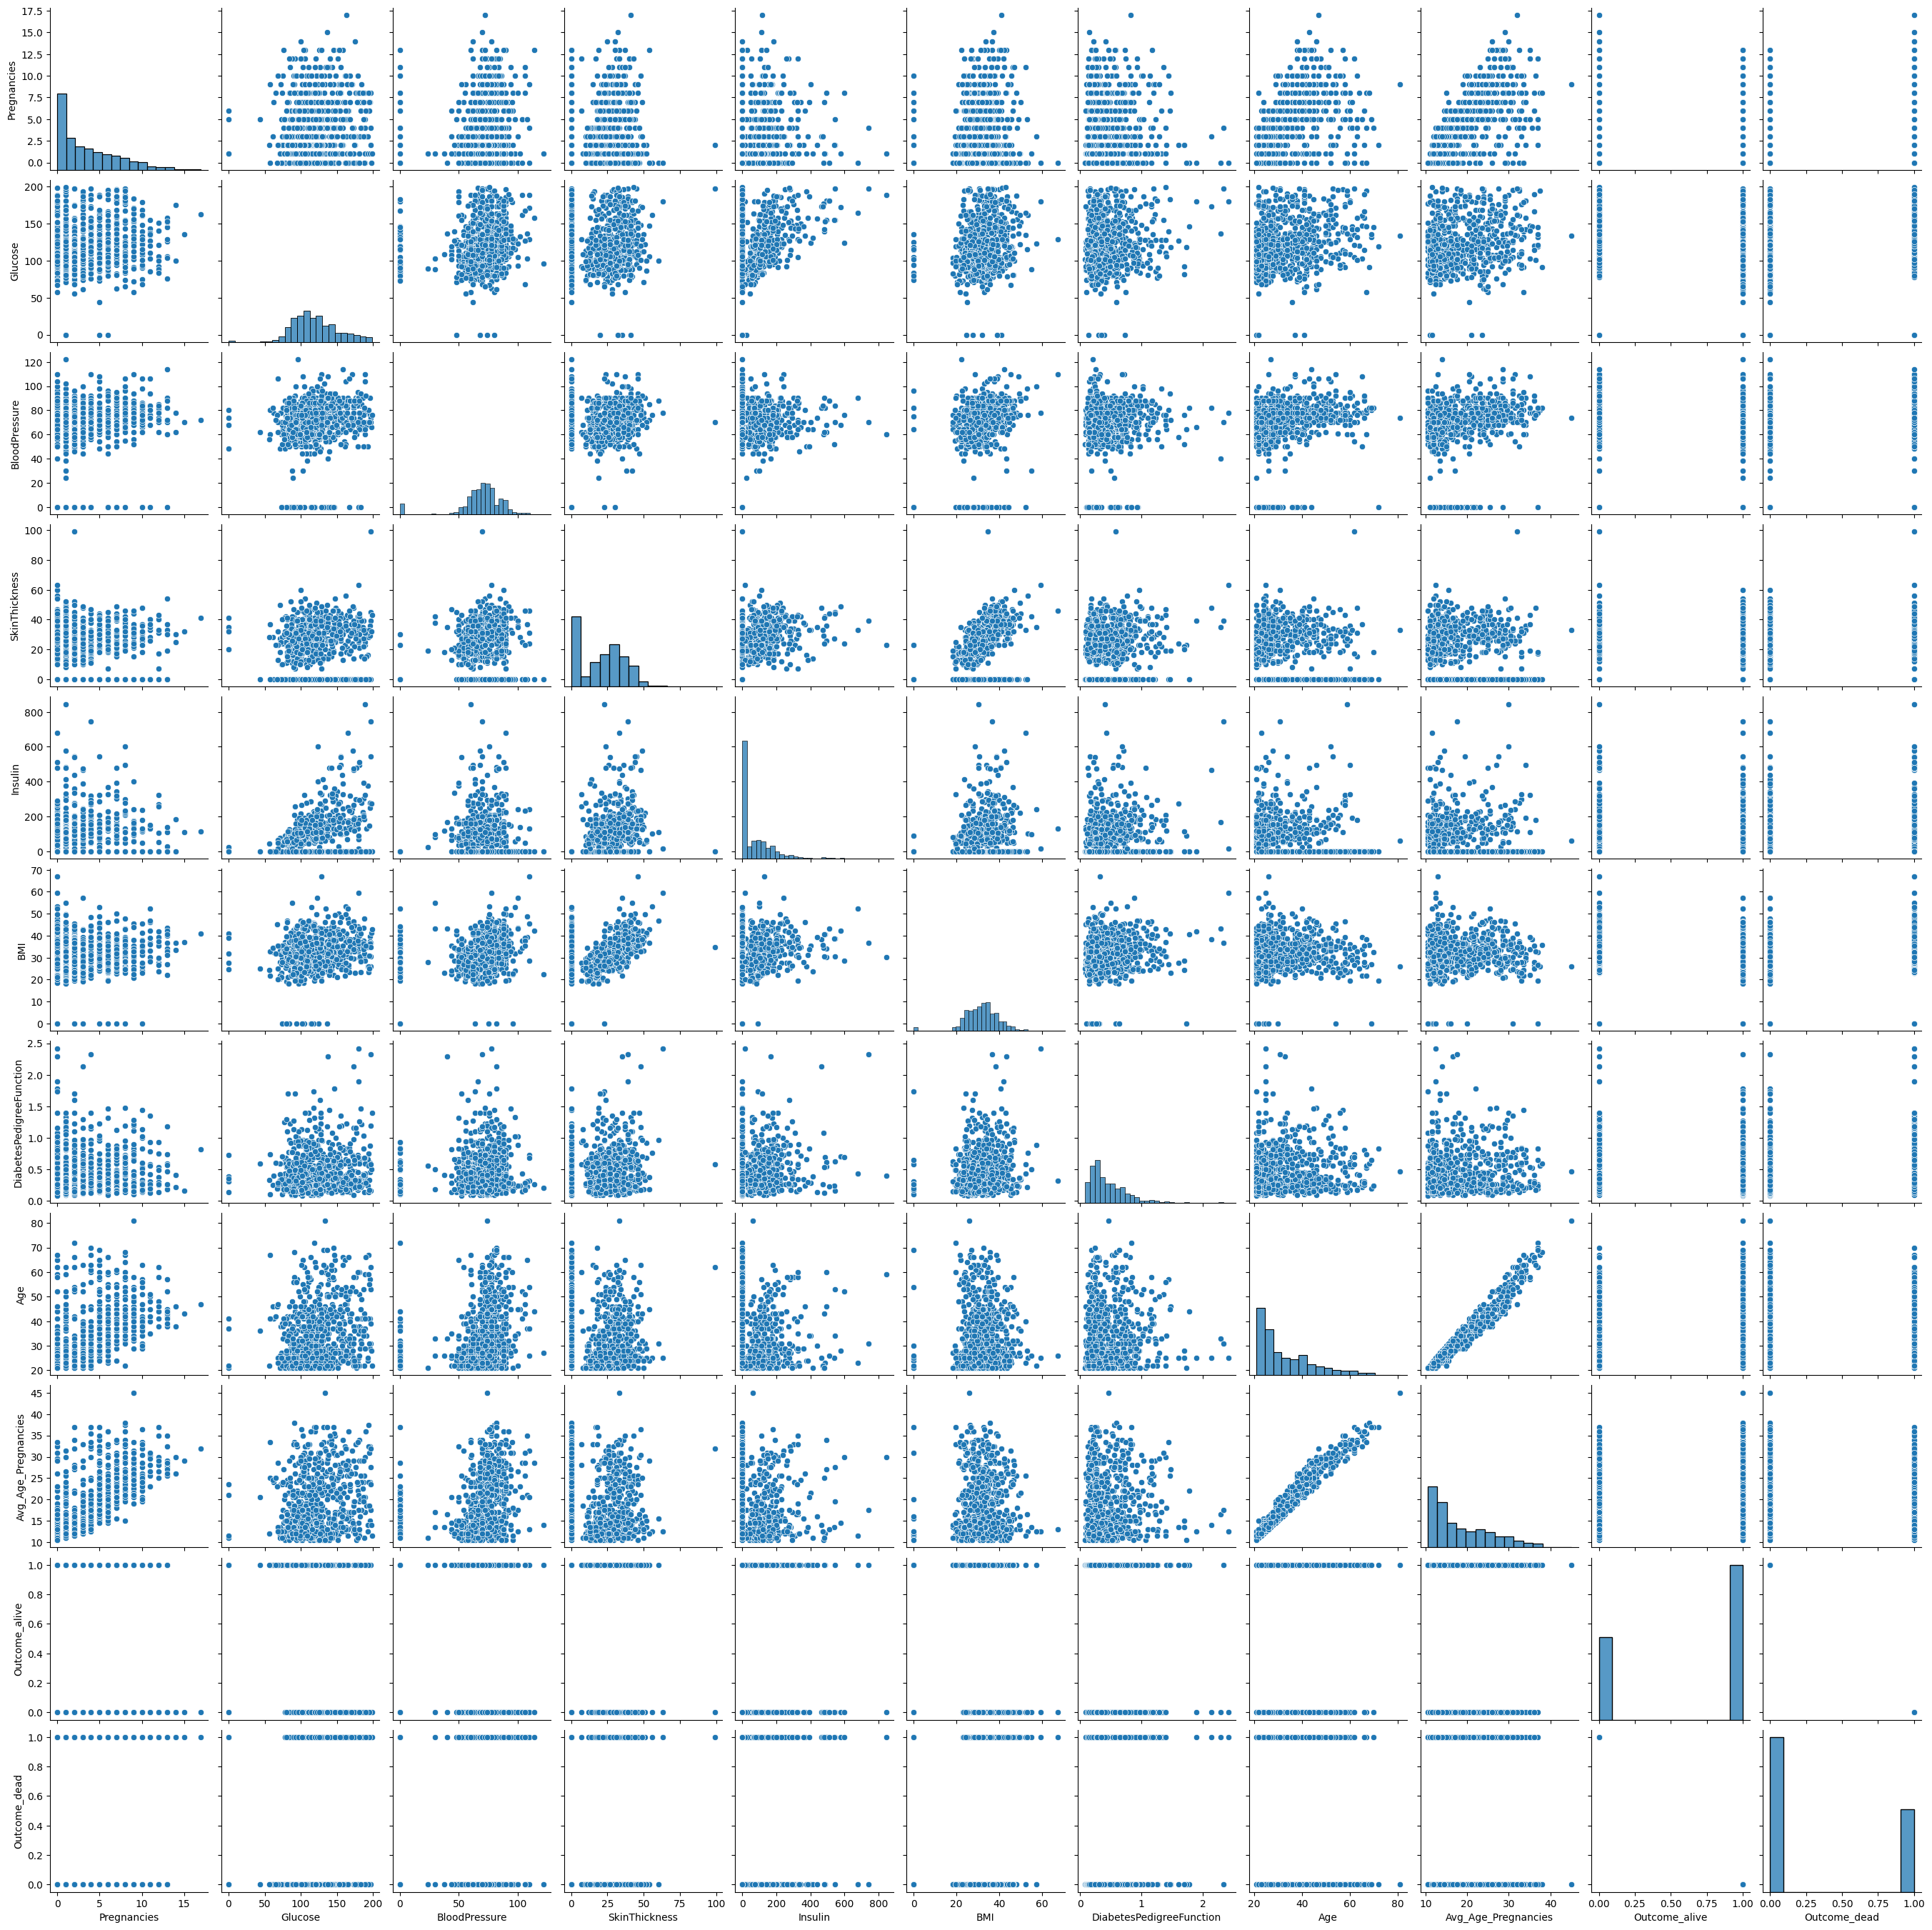

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature distributions and relationships
sns.pairplot(df_encoded)
plt.show()

Conclusion
 We can conclude that using this AutoML such as H20.ai, we got to see different kind of model summary to conclude the data.